In [42]:
library(repr)

# Simulating random variables

## Partitioning uniform random variables

How to simulate a discrete random variable, for instance the outcomes of tossing a coin?

If $U(0,1)$ is a uniform random variable between 0 and 1, a Bernoulli r.v. can be written as 

$$X=\begin{cases}
1 & U<p\\
0 & U\geq p
\end{cases}$$

## Partitioning uniform random variables

$$\begin{align*}
P(H) & =P(X=1)\\
 & =P(U<p)\\
 & =p
\end{align*}$$

## Code in R is just three lines!

In [117]:
p<-0.5
U<-runif(1,min=0,max=1);
X<-U<p
X

[1] TRUE

## How to simulate many toin coss experiments?

Let's see the large numbers law in action

In [11]:
p<-0.5
U<-runif(1,min=0,max=1);
X<-U<p

In [124]:

sus<-0  #number of heads found in the simulation.
p<-0.5
U<-runif(1,min=0,max=1);
X<-U<p # recall that this will produce true (heads) or false (tails)
sus<-sus+X
X+1
 

[1] 1

In [29]:
n<-1000 #number of simulations (toin coss)

sus<-0  #number of heads found in the simulation.
p<-0.5

# This section seems to be repeating
U<-runif(1,min=0,max=1);
X<-U<p
sus<-sus+X
# end of the loop


[1] 1

[1] 0.3855798

In [128]:
n<-100 #number of simulations (toin coss)

sus<-0  #number of heads found in the simulation.
p<-0.5

frh<-numeric(n) # recording every update on proportion of heads found.
for (i in 1:n)
{
    # This section seems to be repeating
    U<-runif(1,min=0,max=1);
    X<-U<p
    sus<-sus+X
    frh[i]<-sus/i
    # end of the loop
}

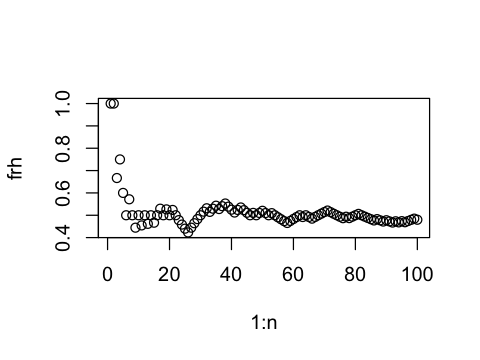

In [129]:
# Now lets plot what we got
options(repr.plot.width=4, repr.plot.height=3)
plot(1:n,frh)


## Binomial r.v. = adding Bernoulli ones

Generate a Binomial random variable with parameters $n=50$ and $p=0.2$.

**Lemma.** If $X_1$, $X_2$,..., $X_n$ are independent Bernoulli r.v., then $X=\sum_{i=1}^{n}{X_i}$ has a Binomial distribution

In [150]:
p<-0.2 # Bernoulli parameter
n<-5 # Number of Bernoulli r.v.'s to sum
U<-runif(n,min=0,max=1)
X<-sum(U<p);
X

[1] 0

Let's perform several experiments

In [156]:
p<-0.2 # Bernoulli parameter
n<-100 # Number of Bernoulli r.v.'s to sum
m<-10 # Number of experiments to perform

frh<-numeric(m)
for (i in 1:m)
{
    # Let's repeat this part
    U<-runif(n,min=0,max=1) 
    X<-sum(U<p);
    frh[i]<-X;
}


[1] 21.4

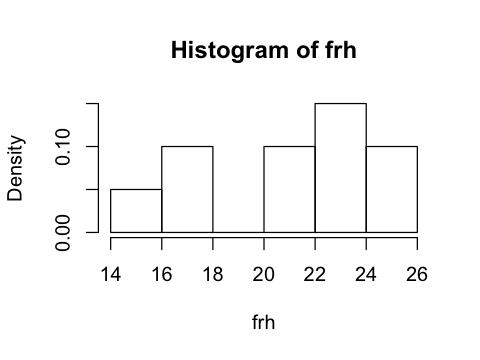

In [158]:
hist(frh,freq = F)
mean(frh)
#curve(dbinom(x,n,p),0,n)

## Constructing continous r.v.'s from uniform r.v.'s

**Theorem.** Let $U\sim$ Uniform$(0,1)$ and F be a CDF which is strictly increasing. Also consider a random variable X define as

$$X=F^{-1}.$$

Then,
$$X\sim F$$

**Proof.**
$$\begin{align*}
P(X\leq x)= & P(F^{-1}(U)\leq x)\\
= & P(U\leq F(x))\\
= & F(x)
\end{align*}$$

## Simulating an exponential random variable
Generate an exponential random variable

\begin{align*}
F(x)= & 1-e^{-x}\\
U\sim & \text{Uniform}(0,1)\\
X= & F^{-1}(U)\\
= & -\ln(1-U)\\
X\sim & F
\end{align*}

## In R is only two lines!

In [164]:
U<-runif(1000,min=0,max=1)
X<--1/2*log(U)
var(X)

[1] 0.2749916

## Comments about the exponential distribution
Mean of a exponential r.v.
$$E[X]=1/\lambda$$
Moment generating function
$$\phi(t)=\lambda/(\lambda-t)$$
Computing the second moment
$$\frac{d^2}{dt^2}\phi(t)|_{t=0}$$

Memoryless property?
$$\frac{P\left\{X>s+t,X>t\right\}}{P\left\{X>s\right\}}=?$$

Hazard rate?
$$r(t)=\frac{f(t)}{1-F(t)}=?$$

What is the sum of n i.i.d. exponetial r.v.'s?

What is the probability of the minimun in the set $X_1$,$X_2$,...,$X_n$ i.i.d. exponential r.v.'s?

# The poisson process

## dCKE equation

$$\begin{align*}
\partial p(z,t|y,t') & =-\sum_{i}\frac{\partial}{\partial z_{i}}[A_{i}(z,t)p(z,t|y,t')]\\
 & +\sum_{i,j}\frac{1}{2}\frac{\partial^{2}}{\partial z_{i}\partial z_{j}}[B_{ij}(z,t)p(z,t|y,t')]\\
 & +\int dx[W(z|x,t)p(x,t|y,t')-W(x|z,t)p(z,t|y,t')]
\end{align*}$$

## Pure jump process

$$\partial p(z,t|y,t')=\int dx[W(z|x,t)p(x,t|y,t')-W(x|z,t)p(z,t|y,t')]$$

## Pure jump process integer

$$\partial P(n,t|n',t')=\sum_{m}[W(n|m,t)P(m,t|n',t')-W(m|n,t)P(n,t|n',t')]$$

## Poisson process

$W(n+1|n,t)=d$, and $W(n|m,t)=0$

$$\partial P(n,t|n',t')=d[P(n-1,t|n',t')-P(n,t|n',t')]$$